In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cancer patient data sets.csv to cancer patient data sets.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("cancer patient data sets.csv")

# Drop unnecessary columns
df.drop(['index', 'Patient Id'], axis=1, errors='ignore', inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cancer patient data sets.csv')
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
y.value_counts()


,count
Level,
0,365
2,332
1,303


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("cancer patient data sets.csv")

# Drop unnecessary columns
df.drop(['index', 'Patient Id'], axis=1, errors='ignore', inplace=True)

X = df.drop('Level', axis=1)
y = df['Level']


le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., Low=0, Medium=1, High=2


# Label encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define selected features
selected_features = ['Smoking', 'Genetic Risk', 'Air Pollution', 'chronic Lung Disease', 'Coughing of Blood', 'Shortness of Breath']

# Features (X) and Target (y)
X = df[selected_features]
y = df['Level']



In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier

# # Load the dataset
# df = pd.read_csv("cancer patient data sets.csv")

# # Drop unnecessary columns
# df.drop(['index', 'Patient Id'], axis=1, errors='ignore', inplace=True)

# # Define selected features and target
# selected_features = ['Smoking', 'Genetic Risk', 'Air Pollution', 'chronic Lung Disease',
#                      'Coughing of Blood', 'Shortness of Breath']
# target_col = 'Level'

# # Encode selected feature columns
# df_encoded = df.copy()
# for col in selected_features:
#     df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# # Encode target column separately and store the encoder
# target_encoder = LabelEncoder()
# df_encoded[target_col] = target_encoder.fit_transform(df_encoded[target_col])

# # Print mapping of risk levels
# print("Class mapping:", dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_))))

# # Prepare features and target
# X = df_encoded[selected_features]
# y = df_encoded[target_col]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train the KNN model
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("cancer patient data sets.csv")

# Drop unnecessary columns
df.drop(['index', 'Patient Id'], axis=1, errors='ignore', inplace=True)

# Define selected features and target
selected_features = ['Smoking', 'Genetic Risk', 'Air Pollution', 'chronic Lung Disease',
                     'Coughing of Blood', 'Shortness of Breath']
target_col = 'Level'

# Copy and encode
df_encoded = df.copy()

# Encode feature columns
feature_encoders = {}
for col in selected_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    feature_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
df_encoded[target_col] = target_encoder.fit_transform(df_encoded[target_col])

# Print mapping
print("Class mapping:", dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_))))

# Prepare features and target
X = df_encoded[selected_features]
y = df_encoded[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# ✅ Predict function
def predict_risk(input_data):
    """
    input_data: list of 6 numeric values corresponding to selected_features
    Returns: predicted label and probability dict
    """
    input_df = pd.DataFrame([input_data], columns=selected_features)
    input_scaled = scaler.transform(input_df)

    pred = knn.predict(input_scaled)
    proba = knn.predict_proba(input_scaled)[0]

    risk = target_encoder.inverse_transform(pred)[0]

    class_labels = target_encoder.inverse_transform(knn.classes_)
    proba_dict = {label: round(p * 100, 1) for label, p in zip(class_labels, proba)}

    return risk, proba_dict

# ✅ Test example
sample_input = [3.93, 3.58, 4.25, 3.52, 3.45, 3.03]
label, probas = predict_risk(sample_input)
print("Prediction:", label)
print("Probabilities:", probas)


Class mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Prediction: Medium
Probabilities: {'High': np.float64(0.0), 'Low': np.float64(0.0), 'Medium': np.float64(100.0)}


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("cancer patient data sets.csv")

# Drop unnecessary columns
df.drop(['index', 'Patient Id'], axis=1, errors='ignore', inplace=True)

# Define selected features and target
selected_features = ['Smoking', 'Genetic Risk', 'Air Pollution', 'chronic Lung Disease',
                     'Coughing of Blood', 'Shortness of Breath']
target_col = 'Level'

# Copy and encode selected features
df_encoded = df.copy()
feature_encoders = {}
for col in selected_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    feature_encoders[col] = le  # store if needed

# Encode target column
target_encoder = LabelEncoder()
df_encoded[target_col] = target_encoder.fit_transform(df_encoded[target_col])

# Print class mapping for reference
print("Class mapping:", dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_))))

# Split data
X = df_encoded[selected_features]
y = df_encoded[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediction function (only label)
def predict_risk(input_data):
    input_scaled = scaler.transform([input_data])
    pred = knn.predict(input_scaled)
    risk = target_encoder.inverse_transform(pred)[0]
    return risk

# Test sample input
sample_input = [3.93, 3.58, 4.25, 3.52, 3.45, 3.03]
label = predict_risk(sample_input)
print("Predicted Risk Level:", label)


Class mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Predicted Risk Level: Medium


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("🔹 Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc * 100, 2), "%")

# Precision, Recall, F1-score (macro avg for multiclass)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("🔸 Precision:", round(precision, 2))
print("🔸 Recall:", round(recall, 2))
print("🔸 F1 Score:", round(f1, 2))

# Classification Report (gives precision, recall, f1 per class)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


🔹 Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
✅ Accuracy: 100.0 %
🔸 Precision: 1.0
🔸 Recall: 1.0
🔸 F1 Score: 1.0

📊 Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
!pip install matplotlib seaborn



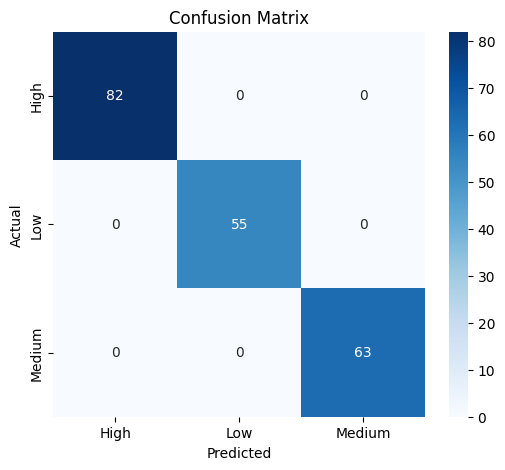

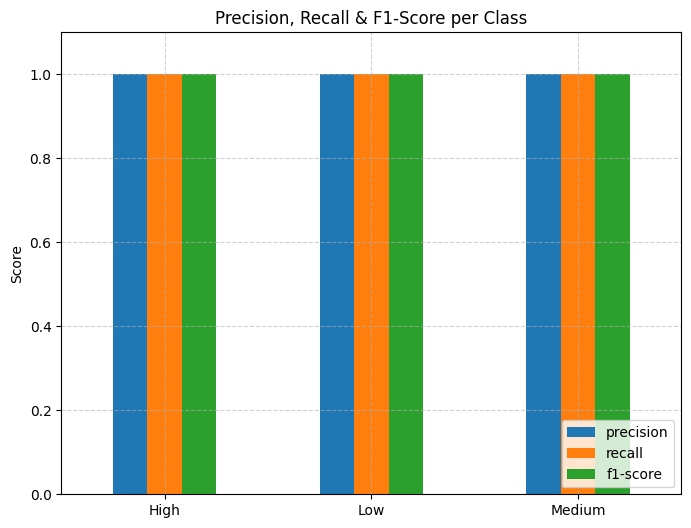

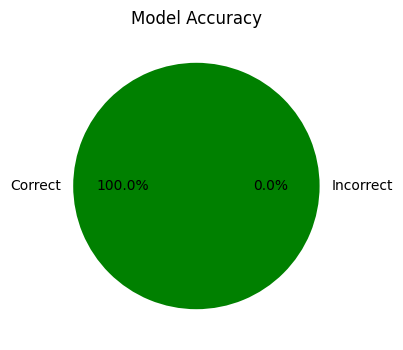

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


# Predict on test data
y_pred = knn.predict(X_test_scaled)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = target_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Classification Report (Bar Plot)
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:-3, :]  # Remove avg rows

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 6))
plt.title("Precision, Recall & F1-Score per Class")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()

# 3. Accuracy Pie Chart (Optional)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4, 4))
plt.pie([accuracy, 1 - accuracy], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Model Accuracy")
plt.show()


In [ ]:
# # Sample input (1 to 10 scale — should be similar to scaled training data)
# test_input = [[10, 10, 10, 10, 10, 10]]  # Highest values = highest risk

# # Scale test input
# test_input_scaled = scaler.transform(test_input)

# # Predict risk
# pred = knn.predict(test_input_scaled)
# proba = knn.predict_proba(test_input_scaled)[0]

# # Print results
# print("Probabilities:", proba)
# print("Predicted Risk:", target_encoder.inverse_transform(pred)[0])


Probabilities: [1. 0. 0.]
Predicted Risk: High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np

# Function to predict lung cancer risk (only label)
def predict_risk(smoking, genetic_risk, air_pollution, chronic_lung_disease, coughing_blood, shortness_breath):
    input_data = np.array([[smoking, genetic_risk, air_pollution, chronic_lung_disease, coughing_blood, shortness_breath]])
    input_scaled = scaler.transform(input_data)
    pred = knn.predict(input_scaled)
    risk = target_encoder.inverse_transform(pred)[0]

    # Color-coded response
    if risk == 'Low':
        return "🟢 Low Risk"
    elif risk == 'Medium':
        return "🟡 Medium Risk"
    else:
        return "🔴 High Risk"

# Gradio Interface
gr.Interface(
    fn=predict_risk,
    inputs=[
        gr.Slider(1, 10, label="Smoking"),
        gr.Slider(1, 10, label="Genetic Risk"),
        gr.Slider(1, 10, label="Air Pollution"),
        gr.Slider(1, 10, label="Chronic Lung Disease"),
        gr.Slider(1, 10, label="Coughing of Blood"),
        gr.Slider(1, 10, label="Shortness of Breath"),
    ],
    outputs="text",
    title="🩺 Lung Cancer Risk Prediction",
    description="Move sliders (scale 1–10) based on patient health data to predict lung cancer risk level."
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec41f6c46668314ffc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np

# Define the prediction function
def predict_risk(input_data):
    """
    input_data: list of 6 numeric values corresponding to selected_features
    Returns: predicted label and probability dict
    """
    input_df = pd.DataFrame([input_data], columns=selected_features)
    input_scaled = scaler.transform(input_df)

    pred = knn.predict(input_scaled)
    proba = knn.predict_proba(input_scaled)[0]

    risk = target_encoder.inverse_transform(pred)[0]

    proba_dict = {
        target_encoder.inverse_transform([i])[0]: round(prob * 100, 1)
        for i, prob in enumerate(proba)
    }

    return risk, proba_dict

# Gradio interface
def gradio_predict(smoking, genetic_risk, air_pollution, chronic_lung_disease, coughing_blood, breathlessness):
    input_vals = [
        smoking, genetic_risk, air_pollution,
        chronic_lung_disease, coughing_blood, breathlessness
    ]
    prediction, probabilities = predict_risk(input_vals)

    prob_str = "\n".join([f"{k}: {v}%" for k, v in probabilities.items()])
    return f"Prediction: {prediction}", prob_str

# Create the GUI interface
interface = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Slider(1, 10, label="Smoking"),
        gr.Slider(1, 10, label="Genetic Risk"),
        gr.Slider(1, 10, label="Air Pollution"),
        gr.Slider(1, 10, label="Chronic Lung Disease"),
        gr.Slider(1, 10, label="Coughing of Blood"),
        gr.Slider(1, 10, label="Shortness of Breath"),
    ],
    outputs=[
        gr.Textbox(label="Predicted Risk Level"),
        gr.Textbox(label="Probabilities (%)"),
    ],
    title="Lung Cancer Risk Level Predictor",
    description="Enter values between 1 to 10 for each risk factor to predict the level of lung cancer risk."
)

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fa370b66ea31dcdede.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
